<a href="https://colab.research.google.com/github/gpolonio15/RandomForest/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install h2o

     |████████████████████████████████| 176.2 MB 26.7 MB/s eta 0:00:01     |█████████████████████▋          | 118.9 MB 40.2 MB/s eta 0:00:02     |████████████████████████████▊   | 158.3 MB 14.6 MB/s eta 0:00:02
  Created wheel for h2o: filename=h2o-3.36.0.3-py2.py3-none-any.whl size=176244303 sha256=7c551e48df5e025a7c057325d8ed0f0740df25af75a85bca1890c2520005af6d
  Stored in directory: /Users/gpolonio15/Library/Caches/pip/wheels/33/d8/e3/bfb993adafc3caa68623779bb744f889d999ff68b2a776b75f
Successfully built h2o
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install mat4py

Note: you may need to restart the kernel to use updated packages.


In [ ]:
# Tratamiento de datos
# ==============================================================================
import numpy as np
import pandas as pd

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
from mat4py import loadmat

# Preprocesado y modelado
# ==============================================================================
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ParameterGrid
from sklearn.inspection import permutation_importance
import multiprocessing
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Preprocesado y modelado
# ==============================================================================
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('once')
from fitter import Fitter, get_common_distributions

In [ ]:
housing = fetch_openml(name="house_sales", version=2, as_frame=True)
datos = np.column_stack((housing.data, housing.target))
datos = pd.DataFrame(datos,columns = np.append(housing.feature_names, "precio"))
datos.head(3)
datos.drop('date', axis=1)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,precio
0,3,1,1180,5650,1,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,221900
1,3,2.25,2570,7242,2,0,0,3,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639,538000
2,2,1,770,10000,1,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,180000
3,4,3,1960,5000,1,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,604000
4,3,2,1680,8080,1,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,510000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.5,1530,1131,3,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,360000
21609,4,2.5,2310,5813,2,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,400000
21610,2,0.75,1020,1350,2,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,402101
21611,3,2.5,1600,2388,2,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,400000


In [ ]:
datos.columns = ["fecha", "habitaciones", "baños", "metros_terreno",
                 "metros_habitables", "plantas", "vistas_mar", 
                 "vistas", "condiciones_pisos", "nivel_construccion", "metros_piso_inferior",
                 "metros_piso_superior", "año_contruccion", "año_renovacion",
                 "codigo_postal", "latitud","longitud","sqft_living15","sqft_lot15","precio"]
datos.head(4)

datos['habitaciones'] = datos['habitaciones'].astype(float)
datos['baños'] = datos['baños'].astype(float)
datos['metros_terreno'] = datos['metros_terreno'].astype(float)
datos['metros_habitables'] = datos['metros_habitables'].astype(float)
datos['plantas'] = datos['plantas'].astype(float)
datos['vistas_mar'] = datos['vistas_mar'].astype(float)
datos['vistas'] = datos['vistas'].astype(float)
datos['condiciones_pisos'] = datos['condiciones_pisos'].astype(float)
datos['nivel_construccion'] = datos['nivel_construccion'].astype(float)
datos['metros_piso_inferior'] = datos['metros_piso_inferior'].astype(float)
datos['metros_piso_superior'] = datos['metros_piso_superior'].astype(float)
datos['año_contruccion'] = datos['año_contruccion'].astype(float)
datos['año_renovacion'] = datos['año_renovacion'].astype(float)
datos['codigo_postal'] = datos['codigo_postal'].astype(float)
datos['latitud'] = datos['latitud'].astype(float)
datos['longitud'] = datos['longitud'].astype(float)
datos['sqft_living15'] = datos['sqft_living15'].astype(float)
datos['sqft_lot15'] = datos['sqft_lot15'].astype(float)
datos['precio'] = datos['precio'].astype(float)


In [ ]:
# Tipo de cada columna
# ==============================================================================
# En pandas, el tipo "object" hace referencia a strings
# datos.dtypes
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fecha                 21613 non-null  object 
 1   habitaciones          21613 non-null  float64
 2   baños                 21613 non-null  float64
 3   metros_terreno        21613 non-null  float64
 4   metros_habitables     21613 non-null  float64
 5   plantas               21613 non-null  float64
 6   vistas_mar            21613 non-null  float64
 7   vistas                21613 non-null  float64
 8   condiciones_pisos     21613 non-null  float64
 9   nivel_construccion    21613 non-null  float64
 10  metros_piso_inferior  21613 non-null  float64
 11  metros_piso_superior  21613 non-null  float64
 12  año_contruccion       21613 non-null  float64
 13  año_renovacion        21613 non-null  float64
 14  codigo_postal         21613 non-null  float64
 15  latitud            

In [ ]:
datos.shape

(21613, 20)

In [ ]:
# Número de datos ausentes por variable
# ==============================================================================
datos.isna().sum().sort_values()

fecha                   0
sqft_living15           0
longitud                0
latitud                 0
codigo_postal           0
año_renovacion          0
año_contruccion         0
metros_piso_superior    0
metros_piso_inferior    0
nivel_construccion      0
condiciones_pisos       0
vistas                  0
vistas_mar              0
plantas                 0
metros_habitables       0
metros_terreno          0
baños                   0
habitaciones            0
sqft_lot15              0
precio                  0
dtype: int64

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-pack

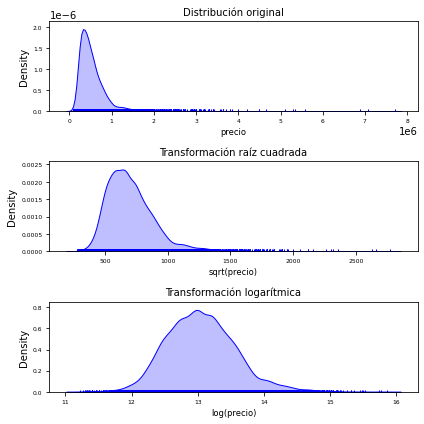

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(6, 6))
sns.distplot(
    datos.precio,
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('precio', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(datos.precio),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(precio)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(datos.precio),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(precio)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [ ]:
distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(datos.precio, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div
cauchy,1.746704e-12,3.754969e+03,-800835.511282,inf
logistic,1.866886e-12,6.685765e+03,-799397.345445,inf
norm,3.909172e-12,1.465891e+04,-783424.178427,inf
exponpow,6.107440e-12,1.127209e+04,-773770.865066,inf
expon,6.558930e-12,4.253471e+03,-772239.411398,inf
beta,7.796307e-12,4.269529e+03,-768484.233636,inf
powerlaw,1.216284e-11,3.264619e+03,-758882.152308,inf
chi2,1.730546e-11,inf,-751260.618576,9.98105
gamma,1.730546e-11,inf,-751260.618576,NaN


In [ ]:
datos.describe()

,habitaciones,baños,metros_terreno,metros_habitables,plantas,vistas_mar,vistas,condiciones_pisos,nivel_construccion,metros_piso_inferior,metros_piso_superior,año_contruccion,año_renovacion,codigo_postal,latitud,longitud,sqft_living15,sqft_lot15,precio
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,7.700000e+06


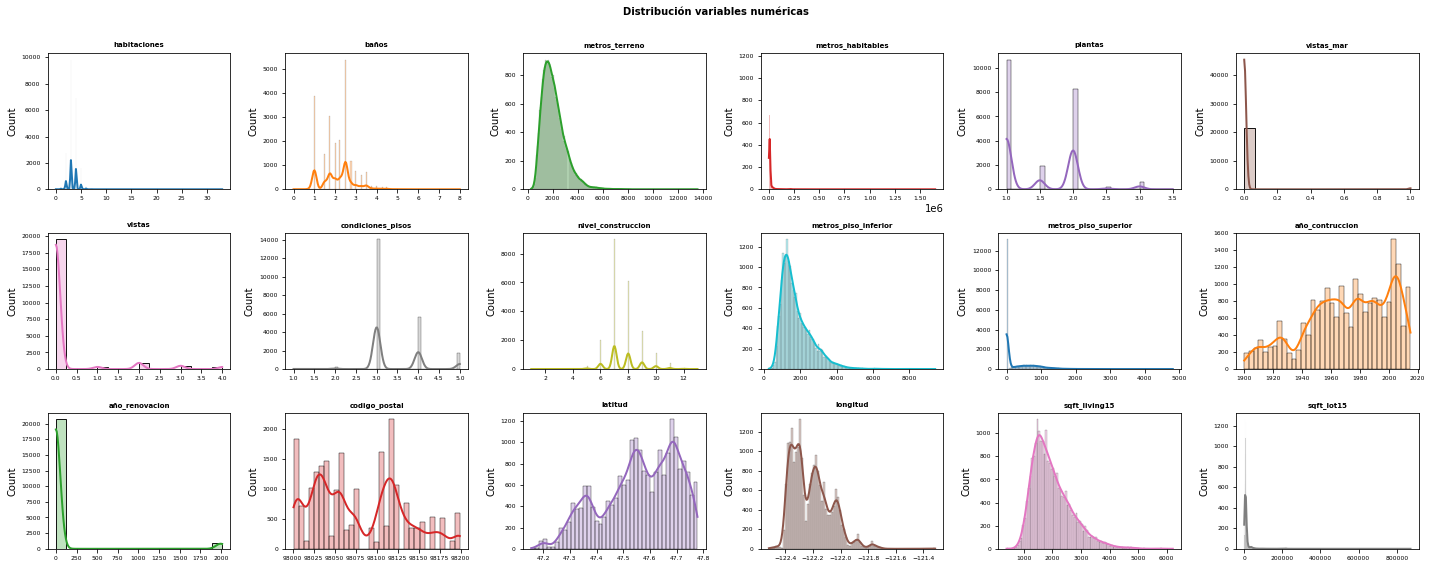

In [ ]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=3, ncols=6, figsize=(20, 8))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.histplot(
        data    = datos,
        x       = colum,
        stat    = "count",
        kde     = True,
        color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 7, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    
    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribución variables numéricas', fontsize = 10, fontweight = "bold");


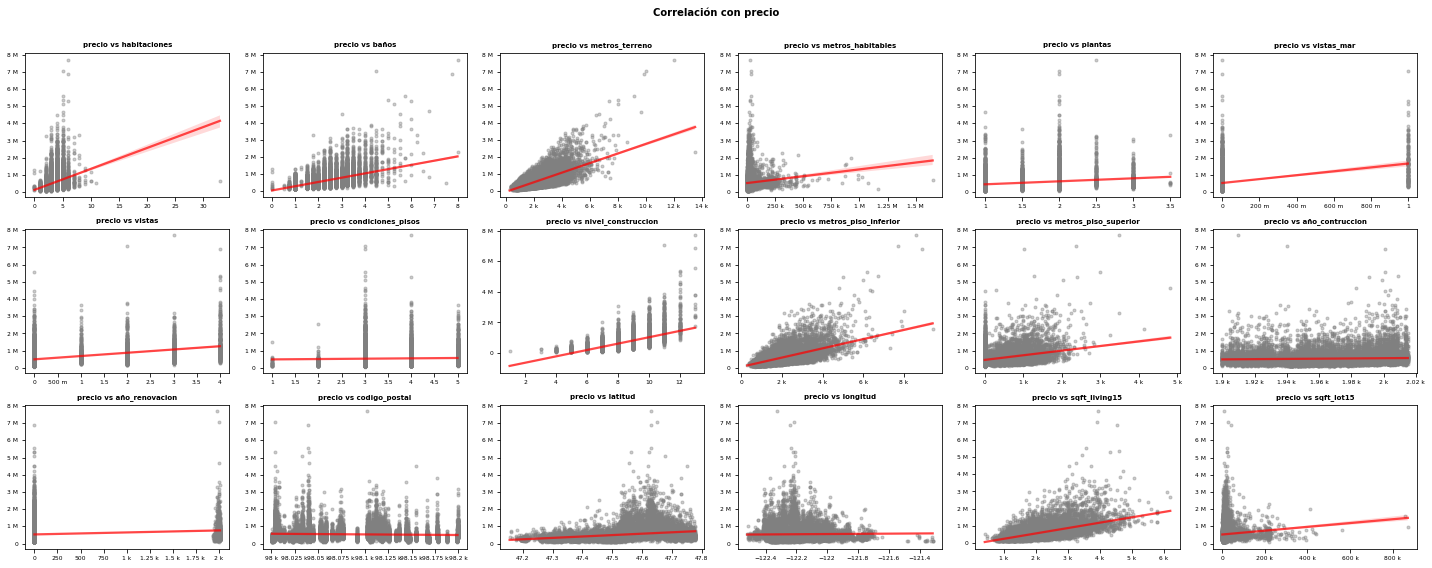

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=6,  figsize=(20, 8))
axes = axes.flat
columnas_numeric = datos.select_dtypes(include=['float64', 'int']).columns
columnas_numeric = columnas_numeric.drop('precio')

for i, colum in enumerate(columnas_numeric):
    sns.regplot(
        x           = datos[colum],
        y           = datos['precio'],
        color       = "gray",
        marker      = '.',
        scatter_kws = {"alpha":0.4},
        line_kws    = {"color":"r","alpha":0.7},
        ax          = axes[i]
    )
    axes[i].set_title(f"precio vs {colum}", fontsize = 7, fontweight = "bold")
    #axes[i].ticklabel_format(style='sci', scilimits=(-4,4), axis='both')
    axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].xaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Correlación con precio', fontsize = 10, fontweight = "bold");

In [ ]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = datos.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(10)

,variable_1,variable_2,r,abs_r
47,metros_terreno,metros_piso_inferior,0.876597,0.876597
173,metros_piso_inferior,metros_terreno,0.876597,0.876597
154,nivel_construccion,metros_terreno,0.762704,0.762704
46,metros_terreno,nivel_construccion,0.762704,0.762704
54,metros_terreno,sqft_living15,0.756420,0.756420
306,sqft_living15,metros_terreno,0.756420,0.756420
161,nivel_construccion,metros_piso_inferior,0.755923,0.755923
179,metros_piso_inferior,nivel_construccion,0.755923,0.755923
21,baños,metros_terreno,0.754665,0.754665
39,metros_terreno,baños,0.754665,0.754665


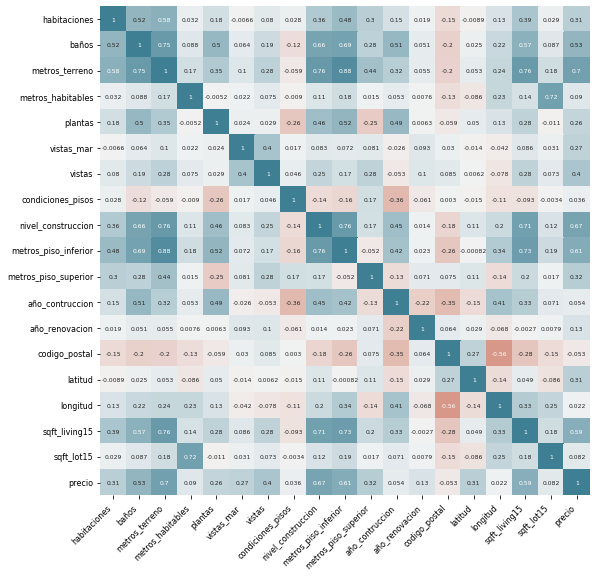

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)


In [ ]:
print('----------------------')
print('Media de cada variable')
print('----------------------')
datos.mean(axis=0)

----------------------
Media de cada variable
----------------------


habitaciones                 3.370842
baños                        2.114757
metros_terreno            2079.899736
metros_habitables        15106.967566
plantas                      1.494309
vistas_mar                   0.007542
vistas                       0.234303
condiciones_pisos            3.409430
nivel_construccion           7.656873
metros_piso_inferior      1788.390691
metros_piso_superior       291.509045
año_contruccion           1971.005136
año_renovacion              84.402258
codigo_postal            98077.939805
latitud                     47.560053
longitud                  -122.213896
sqft_living15             1986.552492
sqft_lot15               12768.455652
precio                  540088.141767
dtype: float64

In [ ]:
print('-------------------------')
print('Varianza de cada variable')
print('-------------------------')
datos.var(axis=0)

-------------------------
Varianza de cada variable
-------------------------


habitaciones            8.650150e-01
baños                   5.931513e-01
metros_terreno          8.435337e+05
metros_habitables       1.715659e+09
plantas                 2.915880e-01
vistas_mar              7.485226e-03
vistas                  5.872426e-01
condiciones_pisos       4.234665e-01
nivel_construccion      1.381703e+00
metros_piso_inferior    6.857347e+05
metros_piso_superior    1.958727e+05
año_contruccion         8.627973e+02
año_renovacion          1.613462e+05
codigo_postal           2.862788e+03
latitud                 1.919990e-02
longitud                1.983262e-02
sqft_living15           4.697612e+05
sqft_lot15              7.455182e+08
precio                  1.347824e+11
dtype: float64

In [ ]:
# Entrenamiento modelo PCA con escalado de los datos
# ==============================================================================
datos_1= datos.drop('fecha', axis=1)
pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit(datos_1)

# Se extrae el modelo entrenado del pipeline
modelo_pca = pca_pipe.named_steps['pca']

In [ ]:
# Se combierte el array a dataframe para añadir nombres a los ejes.
pd.DataFrame(
    data    = modelo_pca.components_,
    columns = datos_1.columns,
    index   = ['PC1', 'PC2', 'PC3', 'PC4','PC5','PC6','PC7','PC8','PC9','PC10','PC11'
              'PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20']
)

,habitaciones,baños,metros_terreno,metros_habitables,plantas,vistas_mar,vistas,condiciones_pisos,nivel_construccion,metros_piso_inferior,metros_piso_superior,año_contruccion,año_renovacion,codigo_postal,latitud,longitud,sqft_living15,sqft_lot15,precio
PC1,2.345388e-01,3.486435e-01,0.387679,9.394170e-02,2.184939e-01,5.997663e-02,1.280547e-01,-6.930616e-02,3.603315e-01,0.376882,0.099347,2.169776e-01,1.274840e-02,-1.368734e-01,1.981344e-02,1.585952e-01,3.453254e-01,9.940027e-02,2.989669e-01
PC2,8.521817e-02,1.592678e-02,0.124158,-1.358340e-01,-1.604907e-01,2.062595e-01,3.129453e-01,2.070512e-01,4.360481e-02,-0.066864,0.382763,-3.641226e-01,1.742170e-01,3.353496e-01,2.540604e-01,-3.797244e-01,2.792505e-02,-1.444703e-01,3.014103e-01
PC3,-1.540189e-02,-1.136036e-01,0.032925,5.497842e-01,-3.338594e-01,1.071406e-01,1.528031e-01,2.375252e-01,-9.487852e-02,-0.053054,0.167595,-1.977729e-01,4.808004e-02,-1.671272e-01,-1.680245e-01,1.794061e-01,4.597443e-02,5.557980e-01,9.810014e-03
PC4,-3.709104e-01,-8.063008e-02,-0.119273,2.556058e-01,2.980088e-01,3.290905e-01,2.333265e-01,-3.829369e-01,6.446703e-02,0.054355,-0.349220,4.219660e-02,2.086895e-01,2.977219e-01,1.623601e-01,-1.301129e-01,-5.561510e-02,2.445375e-01,9.463278e-02
PC5,8.565935e-02,2.663872e-02,0.062114,2.691225e-01,5.485252e-02,-5.764656e-01,-4.119729e-01,-3.652108e-02,5.402295e-02,0.051439,0.032654,-1.114323e-01,-3.992192e-02,2.916691e-01,4.698263e-01,-1.330999e-01,-1.794329e-02,2.525859e-01,3.169149e-02
PC6,1.910350e-01,7.323109e-02,0.041056,-3.106714e-02,5.317110e-03,-1.414817e-01,-1.452857e-01,-2.104374e-01,-8.141961e-02,0.036319,0.017246,-1.594300e-01,8.770534e-01,-8.557657e-02,-2.169254e-01,3.747586e-02,-5.723528e-02,-3.655263e-02,-8.229380e-02
PC7,2.468784e-01,2.050492e-01,0.062049,1.496098e-01,8.330477e-02,-4.547097e-02,1.082171e-01,-2.756789e-01,-6.101413e-02,-0.096543,0.309404,2.283009e-01,-1.898241e-01,3.342398e-01,-4.725003e-01,-3.627191e-01,-1.623854e-01,1.215122e-01,-2.635427e-01
PC8,1.308126e-01,1.947201e-02,0.009783,5.202863e-02,3.437997e-01,-5.465469e-03,-7.026265e-02,6.136986e-01,1.699605e-02,0.240214,-0.429155,-1.942959e-01,7.604621e-03,1.361145e-01,-3.362240e-01,-2.496545e-01,-6.966672e-02,3.098704e-02,1.503175e-02
PC9,4.695693e-01,1.685748e-01,-0.058973,7.881051e-02,1.760126e-01,5.466055e-01,-2.806317e-01,8.190870e-02,-2.361090e-01,-0.086776,0.039982,9.180118e-02,3.917419e-04,-3.485369e-02,3.529648e-01,1.408402e-01,-3.123944e-01,6.539730e-02,-7.329096e-02
PC10,4.493059e-01,-3.038828e-01,0.076130,-4.307253e-02,-3.042026e-01,1.322176e-01,-4.498905e-02,-3.948958e-01,-8.015925e-02,0.261146,-0.330637,-3.452557e-01,-2.241568e-01,1.360884e-01,-7.438384e-02,8.203571e-03,2.266641e-01,-3.395765e-02,-9.995970e-03


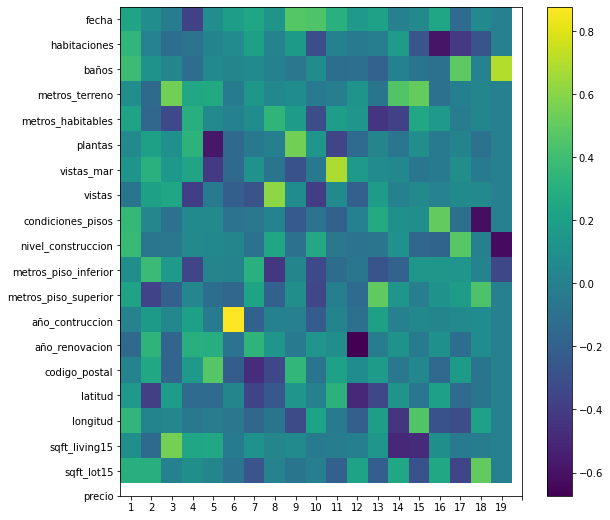

In [ ]:
# Heatmap componentes
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(9, 9))
componentes = modelo_pca.components_
plt.imshow(componentes.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(datos.columns)), datos.columns)
plt.xticks(range(len(datos.columns)), np.arange(modelo_pca.n_components_) + 1)
plt.grid(False)
plt.colorbar();

----------------------------------------------------
Porcentaje de varianza explicada por cada componente
----------------------------------------------------
[2.98706050e-01 1.27107770e-01 9.71101675e-02 7.25173664e-02
 6.35052253e-02 5.29717864e-02 4.93086988e-02 4.40343935e-02
 3.47733504e-02 3.16396863e-02 2.69960697e-02 2.21205301e-02
 1.74759120e-02 1.54851902e-02 1.39287694e-02 1.24869134e-02
 1.02221929e-02 9.60992764e-03 2.26467058e-33]


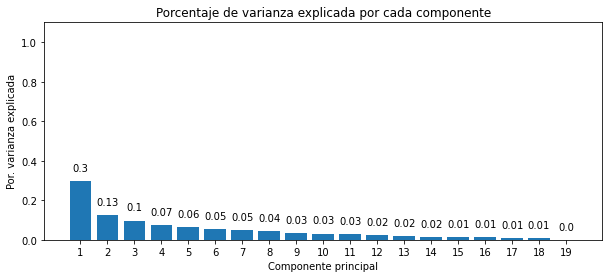

In [ ]:
# Porcentaje de varianza explicada por cada componente
# ==============================================================================
print('----------------------------------------------------')
print('Porcentaje de varianza explicada por cada componente')
print('----------------------------------------------------')
print(modelo_pca.explained_variance_ratio_)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))
ax.bar(
    x      = np.arange(modelo_pca.n_components_) + 1,
    height = modelo_pca.explained_variance_ratio_
)

for x, y in zip(np.arange(len(datos.columns)) + 1, modelo_pca.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_ylim(0, 1.1)
ax.set_title('Porcentaje de varianza explicada por cada componente')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza explicada');

In [ ]:
# Porcentaje de varianza explicada acumulada
# ==============================================================================
prop_varianza_acum = modelo_pca.explained_variance_ratio_.cumsum()
print('------------------------------------------')
print('Porcentaje de varianza explicada acumulada')
print('------------------------------------------')
print(prop_varianza_acum)



for x, y in zip(np.arange(len(datos.columns)) + 1, prop_varianza_acum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )
    
ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(modelo_pca.n_components_) + 1)
ax.set_title('Porcentaje de varianza explicada acumulada')
ax.set_xlabel('Componente principal')
ax.set_ylabel('Por. varianza acumulada');

------------------------------------------
Porcentaje de varianza explicada acumulada
------------------------------------------
[0.29870605 0.42581382 0.52292399 0.59544135 0.65894658 0.71191837
 0.76122706 0.80526146 0.84003481 0.87167449 0.89867056 0.92079109
 0.93826701 0.9537522  0.96768097 0.98016788 0.99039007 1.
 1.        ]


In [ ]:
# Reparto de datos en train y test
# ==============================================================================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                        datos.drop('precio', axis = 'columns'),
                                        datos['precio'],
                                        train_size   = 0.8,
                                        random_state = 1234,
                                        shuffle      = True
                                    )

X_train_1=X_train.drop('fecha', axis=1)

In [ ]:
print("Partición de entrenamento")
print("-----------------------")
print(y_train.describe())

Partición de entrenamento
-----------------------
count    1.729000e+04
mean     5.395540e+05
std      3.682358e+05
min      7.500000e+04
25%      3.209000e+05
50%      4.500000e+05
75%      6.430000e+05
max      7.700000e+06
Name: precio, dtype: float64


In [ ]:
print("Partición de test")
print("-----------------------")
print(y_test.describe())

Partición de test
-----------------------
count    4.323000e+03
mean     5.422243e+05
std      3.626938e+05
min      8.000000e+04
25%      3.242250e+05
50%      4.510000e+05
75%      6.498750e+05
max      7.062500e+06
Name: precio, dtype: float64


In [ ]:
modelo = RandomForestRegressor(
            n_estimators = 10,
            criterion    = 'squared_error',
            max_depth    = None,
            max_features = 'auto',
            oob_score    = False,
            n_jobs       = -1,
            random_state = 123
         )


modelo.fit(X_train_1, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=123)

In [ ]:

X_test_1=X_test.drop('fecha', axis=1)
predicciones = modelo.predict(X = X_test_1)

rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")

El error (rmse) de test es: 134706.74406308634


Valor óptimo de n_estimators: 96


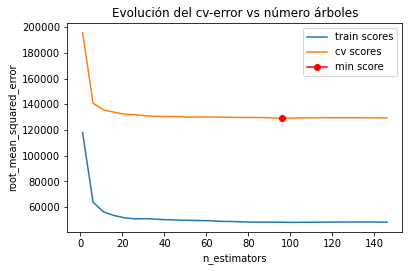

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
estimator_range = range(1, 150, 5)

# Bucle para entrenar un modelo con cada valor de n_estimators y extraer su error
# de entrenamiento y de k-cross-validation.
for n_estimators in estimator_range:
    
    modelo = RandomForestRegressor(
                n_estimators = n_estimators,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = 'auto',
                oob_score    = False,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train_1, y_train)
    predicciones = modelo.predict(X = X_train_1)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train_1,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(estimator_range, train_scores, label="train scores")
ax.plot(estimator_range, cv_scores, label="cv scores")
ax.plot(estimator_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("n_estimators")
ax.set_title("Evolución del cv-error vs número árboles")
plt.legend();
print(f"Valor óptimo de n_estimators: {estimator_range[np.argmin(cv_scores)]}")

Valor óptimo de max_features: 8


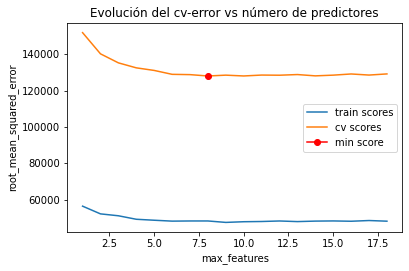

In [ ]:
# Validación empleando k-cross-validation y neg_root_mean_squared_error
# ==============================================================================
train_scores = []
cv_scores    = []

# Valores evaluados
max_features_range = range(1, X_train_1.shape[1] + 1, 1)

# Bucle para entrenar un modelo con cada valor de max_features y extraer su error
# de entrenamiento y de k-cross-validation.
for max_features in max_features_range:
    
    modelo = RandomForestRegressor(
                n_estimators = 100,
                criterion    = 'squared_error',
                max_depth    = None,
                max_features = max_features,
                oob_score    = True,
                n_jobs       = -1,
                random_state = 123
             )
    
    # Error de train
    modelo.fit(X_train_1, y_train)
    predicciones = modelo.predict(X = X_train_1)
    rmse = mean_squared_error(
            y_true  = y_train,
            y_pred  = predicciones,
            squared = False
           )
    train_scores.append(rmse)
    
    # Error de validación cruzada
    scores = cross_val_score(
                estimator = modelo,
                X         = X_train_1,
                y         = y_train,
                scoring   = 'neg_root_mean_squared_error',
                cv        = 5
             )
    # Se agregan los scores de cross_val_score() y se pasa a positivo
    cv_scores.append(-1*scores.mean())
    
# Gráfico con la evolución de los errores
fig, ax = plt.subplots(figsize=(6, 3.84))
ax.plot(max_features_range, train_scores, label="train scores")
ax.plot(max_features_range, cv_scores, label="cv scores")
ax.plot(max_features_range[np.argmin(cv_scores)], min(cv_scores),
        marker='o', color = "red", label="min score")
ax.set_ylabel("root_mean_squared_error")
ax.set_xlabel("max_features")
ax.set_title("Evolución del cv-error vs número de predictores")
plt.legend();
print(f"Valor óptimo de max_features: {max_features_range[np.argmin(cv_scores)]}")

In [ ]:
# Grid de hiperparámetros evaluados
# ==============================================================================
param_grid = {'n_estimators': [150],
              'max_features': [5, 7, 9],
              'max_depth'   : [None, 3, 10, 20]
             }

# Búsqueda por grid search con validación cruzada
# ==============================================================================
grid = GridSearchCV(
        estimator  = RandomForestRegressor(random_state = 123),
        param_grid = param_grid,
        scoring    = 'neg_root_mean_squared_error',
        n_jobs     = multiprocessing.cpu_count() - 1,
        cv         = RepeatedKFold(n_splits=5, n_repeats=3, random_state=123), 
        refit      = True,
        verbose    = 0,
        return_train_score = True
       )

grid.fit(X = X_train_1, y = y_train)

# Resultados
# ==============================================================================
resultados = pd.DataFrame(grid.cv_results_)
resultados.filter(regex = '(param.*|mean_t|std_t)') \
    .drop(columns = 'params') \
    .sort_values('mean_test_score', ascending = False) \
    .head(4)

,param_max_depth,param_max_features,param_n_estimators,mean_test_score,std_test_score,mean_train_score,std_train_score
2,None,9,150,-128427.711511,6955.912386,-48724.292937,909.308942
11,20,9,150,-129306.145771,6899.216207,-50044.162777,789.616520
10,20,7,150,-129428.568792,7192.329134,-50356.996011,791.893979
1,None,7,150,-129487.040160,7301.052982,-49048.218869,792.869688


In [ ]:
# Mejores hiperparámetros por validación cruzada
# ==============================================================================
print("----------------------------------------")
print("Mejores hiperparámetros encontrados (cv)")
print("----------------------------------------")
print(grid.best_params_, ":", grid.best_score_, grid.scoring)


----------------------------------------
Mejores hiperparámetros encontrados (cv)
----------------------------------------
{'max_depth': None, 'max_features': 9, 'n_estimators': 150} : -128427.71151149314 neg_root_mean_squared_error


In [ ]:
#Error de test del modelo final
# ==============================================================================
modelo_final = grid.best_estimator_
predicciones = modelo.predict(X = X_test_1)
rmse = mean_squared_error(
        y_true  = y_test,
        y_pred  = predicciones,
        squared = False
       )
print(f"El error (rmse) de test es: {rmse}")


El error (rmse) de test es: 130928.34997065099


In [ ]:
importancia = permutation_importance(
                estimator    = modelo_final,
                X            = X_train_1,
                y            = y_train,
                n_repeats    = 5,
                scoring      = 'neg_root_mean_squared_error',
                n_jobs       = multiprocessing.cpu_count() - 1,
                random_state = 123
             )

# Se almacenan los resultados (media y desviación) en un dataframe
df_importancia = pd.DataFrame(
                    {k: importancia[k] for k in ['importances_mean', 'importances_std']}
                 )
df_importancia['feature'] = X_train_1.columns
df_importancia.sort_values('importances_mean', ascending=False)

,importances_mean,importances_std,feature
14,172359.123207,955.307859,latitud
2,147191.141243,448.788576,metros_terreno
8,131198.304968,1862.956856,nivel_construccion
15,101723.505130,3108.353030,longitud
16,51598.613039,529.744419,sqft_living15
11,45571.039749,601.715047,año_contruccion
9,31302.429164,186.230970,metros_piso_inferior
13,24837.530097,277.945300,codigo_postal
5,22626.274716,961.138608,vistas_mar
6,21650.101178,179.212279,vistas


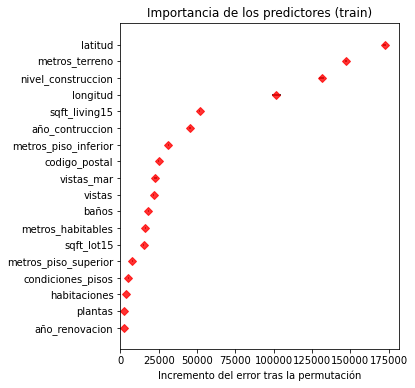

In [ ]:
# Gráfico
fig, ax = plt.subplots(figsize=(5, 6))
df_importancia = df_importancia.sort_values('importances_mean', ascending=True)
ax.barh(
    df_importancia['feature'],
    df_importancia['importances_mean'],
    xerr=df_importancia['importances_std'],
    align='center',
    alpha=0
)
ax.plot(
    df_importancia['importances_mean'],
    df_importancia['feature'],
    marker="D",
    linestyle="",
    alpha=0.8,
    color="r"
)
ax.set_title('Importancia de los predictores (train)')
ax.set_xlabel('Incremento del error tras la permutación');


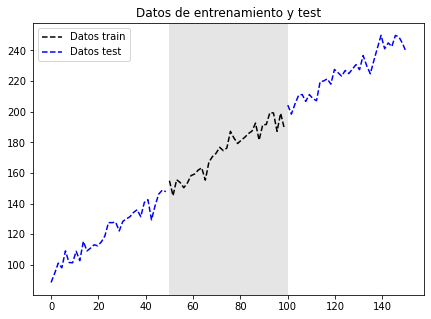

In [ ]:
# Datos simulados
# ==============================================================================
X = np.linspace(0, 150, 100)
y = (X + 100) + np.random.normal(loc=0.0, scale=5.0, size=X.shape)
X_train = X[(X>=50) & (X<100)]
y_train = y[(X>=50) & (X<100)]
X_test_inf = X[X < 50]
y_test_inf = y[X < 50]
X_test_sup = X[X >= 100]
y_test_sup = y[X >= 100]

fig, ax = plt.subplots(figsize=(7, 5))
ax.plot(X_train, y_train, c='black', linestyle='dashed', label = "Datos train")
ax.axvspan(50, 100, color='gray', alpha=0.2, lw=0)
ax.plot(X_test_inf, y_test_inf, c='blue', linestyle='dashed', label = "Datos test")
ax.plot(X_test_sup, y_test_sup, c='blue', linestyle='dashed')
ax.set_title("Datos de entrenamiento y test")
plt.legend();

In [ ]:
predicciones = modelo_final.predict(X = X_train_1)
predicciones[:10]


array([ 508633.70666667,  414331.66666667,  449361.85333333,
        323545.        ,  790961.10666667, 1776180.        ,
        430291.68      ,  553500.10666667,  586954.33333333,
        445121.        ])